This program attempst predict the mutation score of a function

In [15]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
#Collect and clean the data
df = pd.read_json("../output_with_functions.json")
list(df.columns.values)

['file',
 'pattern',
 'check_id',
 'pattern_detailes',
 'function_name',
 'function_scope',
 'mutants',
 'mutation_score']

In [18]:
#View data
df

,file,pattern,check_id,pattern_detailes,function_name,function_scope,mutants,mutation_score
0,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,.//ClassDef,[C001],"{'lineno': 8, 'coloffset': 0, 'linematch': 'cl...",None,None,[],NaN
1,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,.//FunctionDef,[F001],"{'lineno': 6, 'coloffset': 0, 'linematch': 'de...",test_hparams,6-33,[],NaN
2,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,.//FunctionDef,[F001],"{'lineno': 35, 'coloffset': 0, 'linematch': 'd...",test_picable_function,35-51,[],NaN
3,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,.//FunctionDef,[F001],"{'lineno': 53, 'coloffset': 0, 'linematch': 'd...",test_files,53-74,[],NaN
4,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,.//FunctionDef,[F001],"{'lineno': 76, 'coloffset': 0, 'linematch': 'd...",test_directories,76-105,[],NaN
...,...,...,...,...,...,...,...,...
167,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,//Assert[count(.//Call[func/Name/@id='test_fun...,[TMIM001],"{'lineno': 28, 'coloffset': 16, 'linematch': '...",test_cached,5-73,[],NaN
168,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,//Assert[count(.//Call[func/Name/@id='test_fun...,[TMIM001],"{'lineno': 37, 'coloffset': 16, 'linematch': '...",test_cached,5-73,[],NaN
169,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,//Assert[count(.//Call[func/Name/@id='test_fun...,[TMIM001],"{'lineno': 45, 'coloffset': 16, 'linematch': '...",test_cached,5-73,[],NaN
170,/Users/jaclynpham/AstuteSource/SEERS/scripts/a...,//Assert[count(.//Call[func/Name/@id='test_fun...,[TMIM001],"{'lineno': 57, 'coloffset': 16, 'linematch': '...",test_cached,5-73,[],NaN


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180.]),
 [Text(0.0, 0, '[C001]'),
  Text(20.0, 0, '[F002]'),
  Text(40.0, 0, '[BOOL001]'),
  Text(60.0, 0, '[ANNOT001]'),
  Text(80.0, 0, '[F002]'),
  Text(100.0, 0, '[LOF001]'),
  Text(120.0, 0, '[CML001]'),
  Text(140.0, 0, '[CML001]'),
  Text(160.0, 0, '[CML001]'),
  Text(180.0, 0, '')])

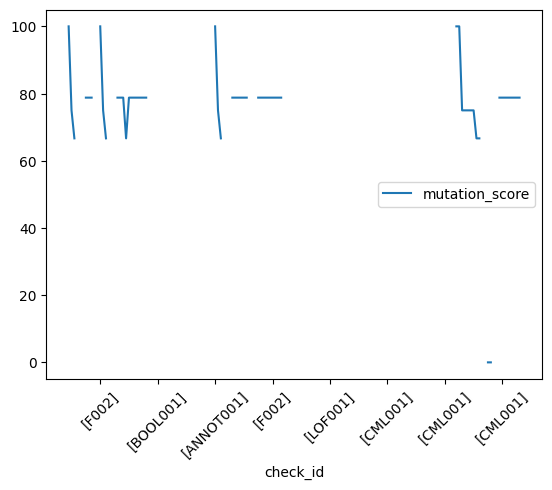

In [19]:
#Show the data visually

df.plot(x="check_id" , y= "mutation_score")
plt.xticks(rotation=45)

In [20]:

#Split data into training and testing sets,(80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df, df['mutation_score'], test_size= 0.2, random_state = 42)

In [21]:
from sklearn.preprocessing import LabelEncoder
#Preprocess data
#Convert text labels "check_id" values into numerical representations that the model can understand and use for learning patterns
def preprocess_data(data):
  le = LabelEncoder() #Create LabelEncoder object
  X_encoded = le.fit_transform(data['pattern']) #map the category with numerical labels

  #a case when we need to add more feature, set None for now
  X_other_features = None

  #Combine features
  if X_other_features is not None:
    X = np.hstack((X_encoded.reshape(-1,1), X_other_features))
  else:
    X=X_encoded.reshape(-1,1) #reshape to ensure correct format in all rows and single column
  return X


In [22]:
#Preprocess training and testing data
X_train_processed = preprocess_data(X_train.copy())
X_test_processed = preprocess_data(X_test.copy())

In [23]:
#Define thresholds to categorize mutation score
low_threshold = 25
medium_threshold = 75

#Map mutation score for categories
def map_to_category(score):
  if score is np.NaN:
    return "NA"
  elif score < low_threshold:
    return "low"
  elif score < medium_threshold:
    return "medium"
  else:
    return "high"

In [2]:
#Convert mutation scores to categories for training
y_train_categories = [map_to_category(score) for score in y_train]
print(y_train_categories)

NameError: name 'y_train' is not defined

In [25]:
#Test data with RandomForestClassifier() since we want to classify mutation in three score categories "low", "medium", "high"

from sklearn.ensemble import RandomForestClassifier

In [26]:
model = RandomForestClassifier()
model.fit(X_train_processed,y_train_categories)


RandomForestClassifier()

In [27]:
#Predict catagories on test set
y_pred_categories = model.predict(X_test_processed)
print(y_pred_categories)

['high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high' 'high'
 'high' 'high' 'high' 'high' 'high']


In [28]:
#Map predicted categories back to low_medium_high labels
y_pred_labels = [map_to_category(score) for score in model.predict(X_test_processed)]

TypeError: '<' not supported between instances of 'numpy.str_' and 'int'